In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# ***1. EDA Analysis***

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('/kaggle/input/iris/Iris.csv')

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [7]:
df1 =df.drop('Id',axis=1)
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# **class investigation**

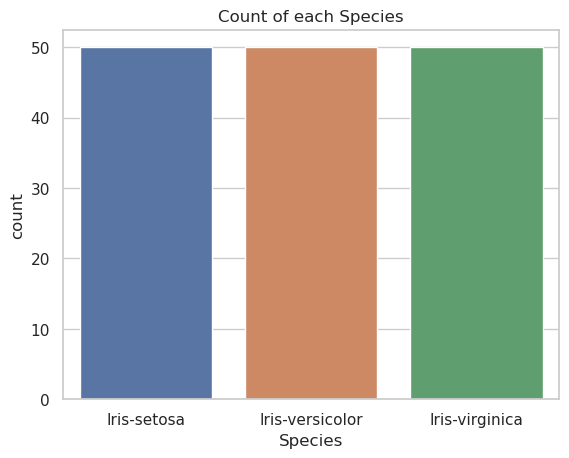

In [11]:
sns.set(style="whitegrid")
sns.countplot(x='Species', data=df)

plt.title('Count of each Species')
plt.show()

# **bar graph**

<Axes: xlabel='Species'>

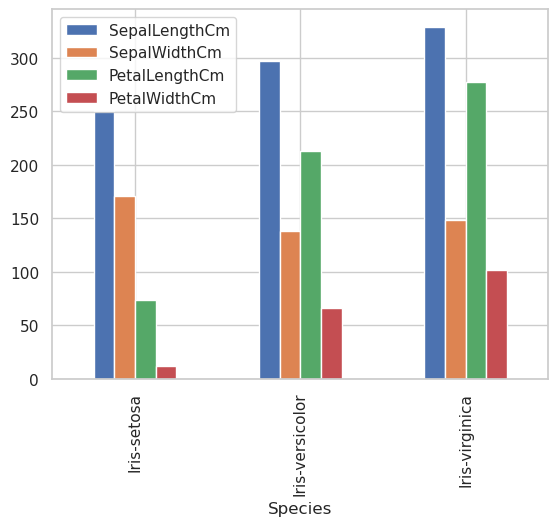

In [12]:
df1.groupby(["Species"]).sum().plot(kind = "bar")

# **plot histogram**

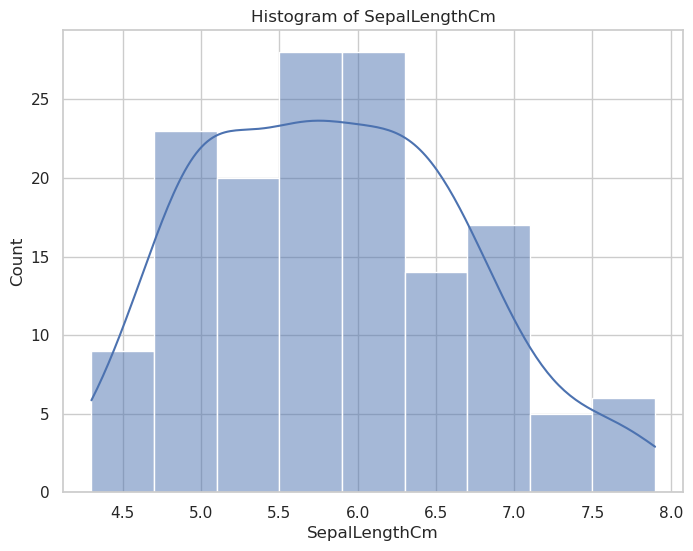

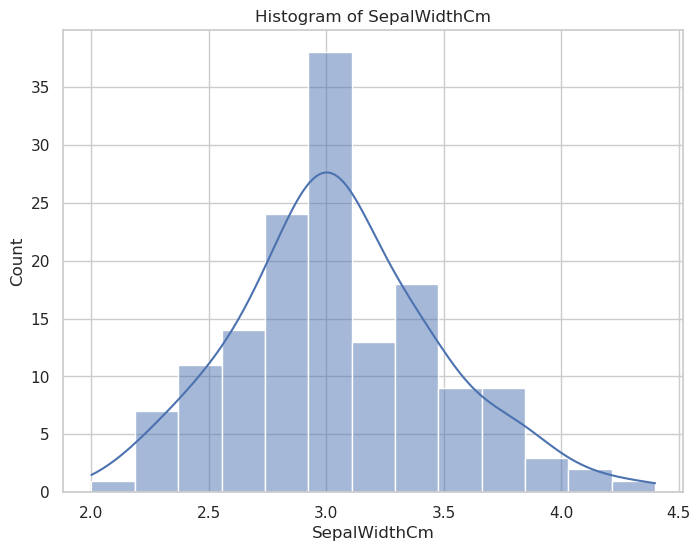

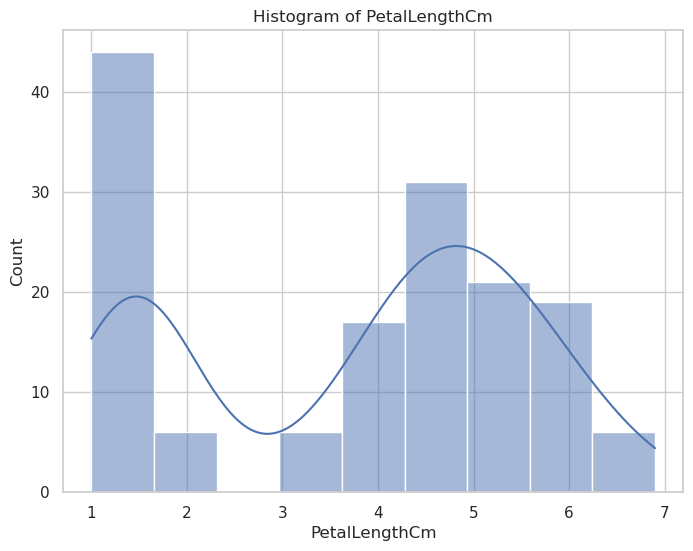

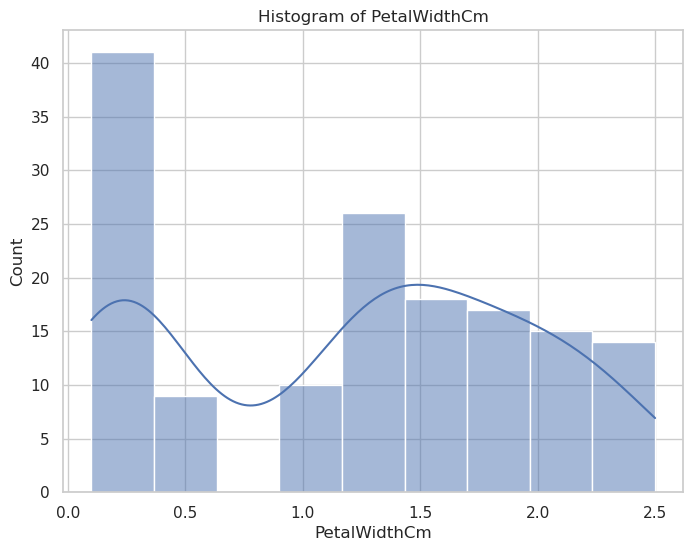

In [13]:
features=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')
    plt.show()

# **kde plot**

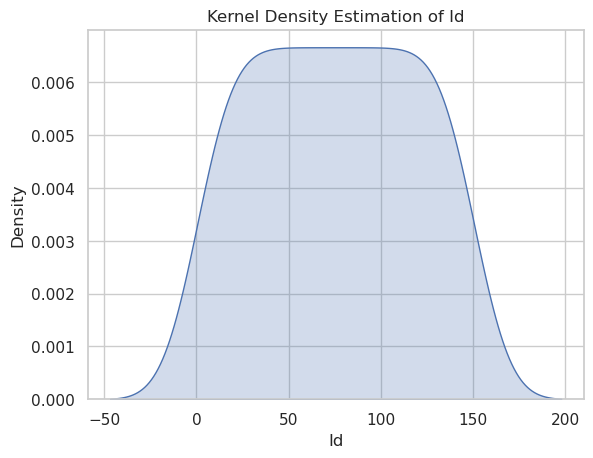

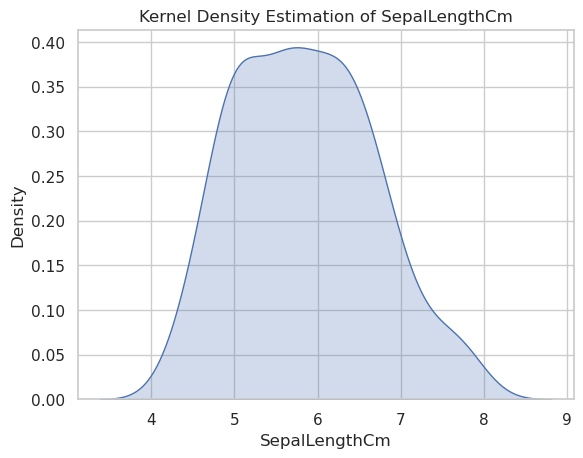

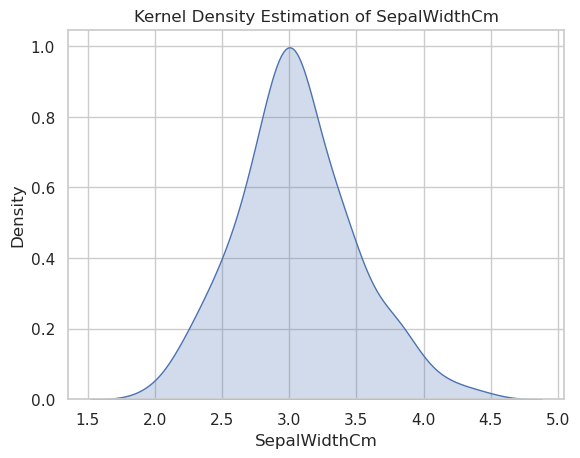

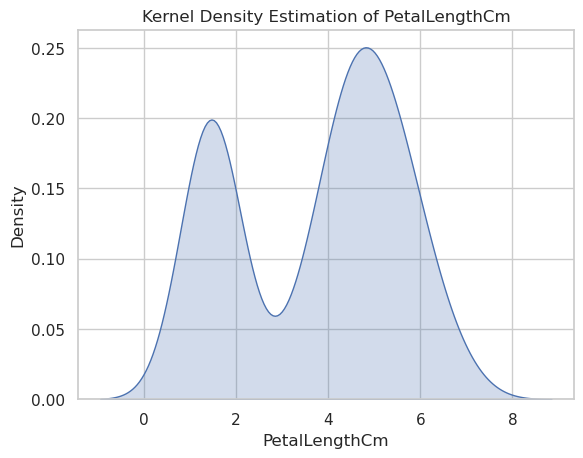

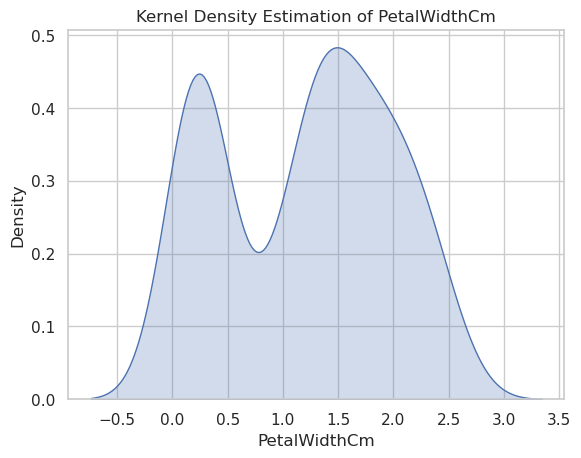

In [14]:
for feature in df.columns[:-1]:  # Exclude the last column 'Species'
    sns.kdeplot(data=df, x=feature, fill=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimation of {feature}')
    plt.show()

# **pie plot**

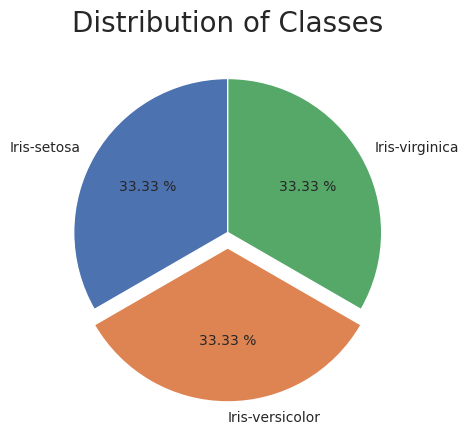

In [15]:
count_list = [(df.Species == "Iris-setosa").sum(), (df.Species == "Iris-versicolor").sum(), (df.Species == "Iris-virginica").sum()]
label_list = list(df["Species"].unique())
plt.figure(figsize = (10, 5))
plt.pie(count_list, labels = label_list, autopct = "%.2f %%", startangle = 90, explode = (0.0, 0.1, 0.0), textprops = {"fontsize": 10})
plt.title("Distribution of Classes", fontsize = 20)
plt.show()

# **scatter plot**

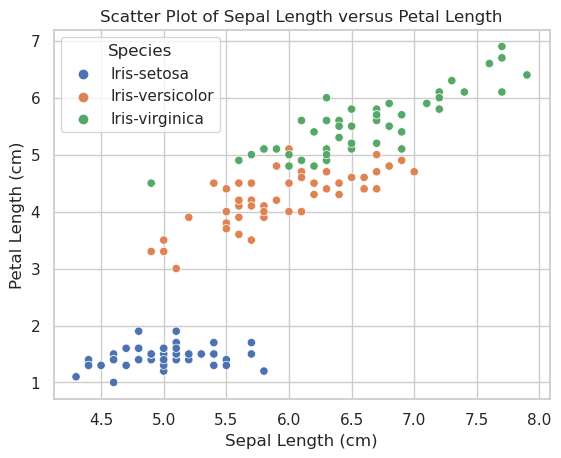

In [16]:
sns.scatterplot(data=df, x='SepalLengthCm', y='PetalLengthCm', hue='Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter Plot of Sepal Length versus Petal Length')
plt.show()

# **box plot**

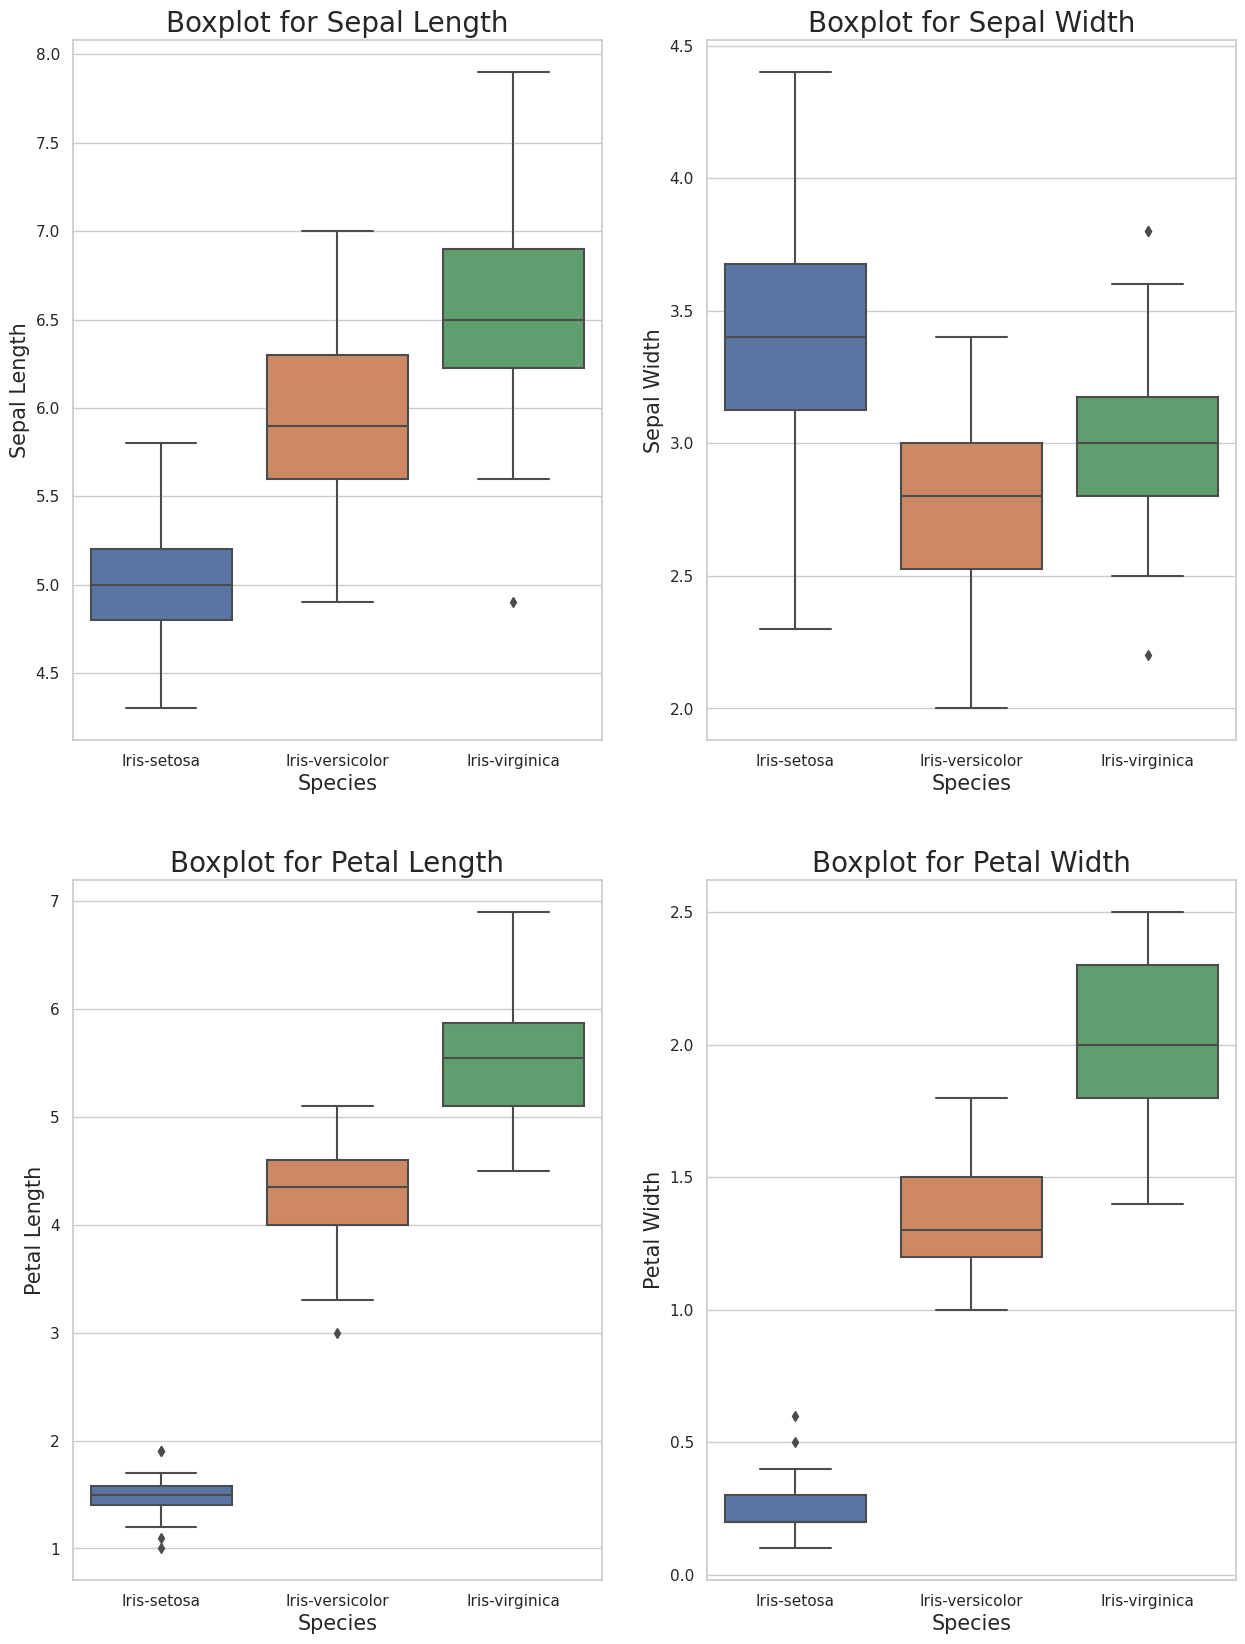

In [17]:
plt.figure(figsize=(15, 20))

def create_boxplot(feature):
    sns.boxplot(data = df, x = 'Species', y = feature)
    if(feature == 'SepalLengthCm'):
        feature = 'Sepal Length'
    if(feature == 'SepalWidthCm'):
        feature = 'Sepal Width'
    if(feature == 'PetalLengthCm'):
        feature = 'Petal Length'
    if(feature == 'PetalWidthCm'):
        feature = 'Petal Width'
    plt.title('Boxplot for ' + feature, fontsize = 20)
    plt.xlabel('Species', fontsize = 15)
    plt.ylabel(feature, fontsize = 15)
      
plt.subplot(221)
create_boxplot('SepalLengthCm')
  
plt.subplot(222)
create_boxplot('SepalWidthCm')
  
plt.subplot(223)
create_boxplot('PetalLengthCm')
  
plt.subplot(224)
create_boxplot('PetalWidthCm')
  
plt.show()


# **pair plot**

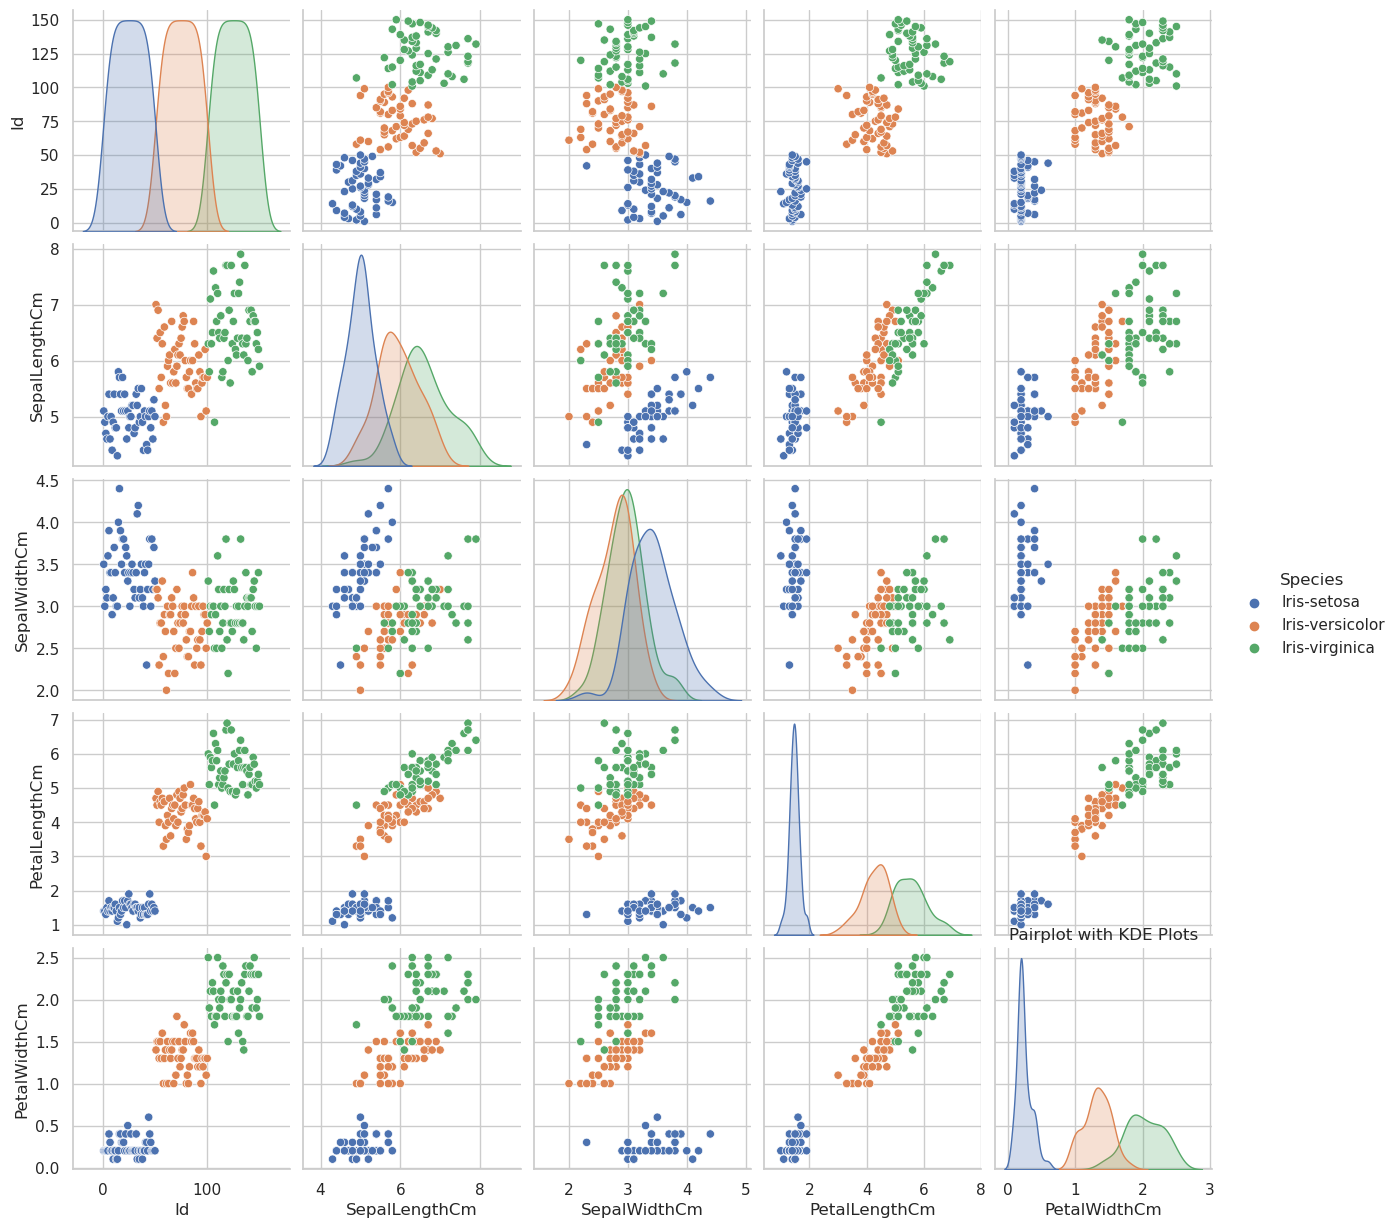

In [18]:
sns.pairplot(data=df, hue='Species', diag_kind='kde')
plt.title('Pairplot with KDE Plots')
plt.show()

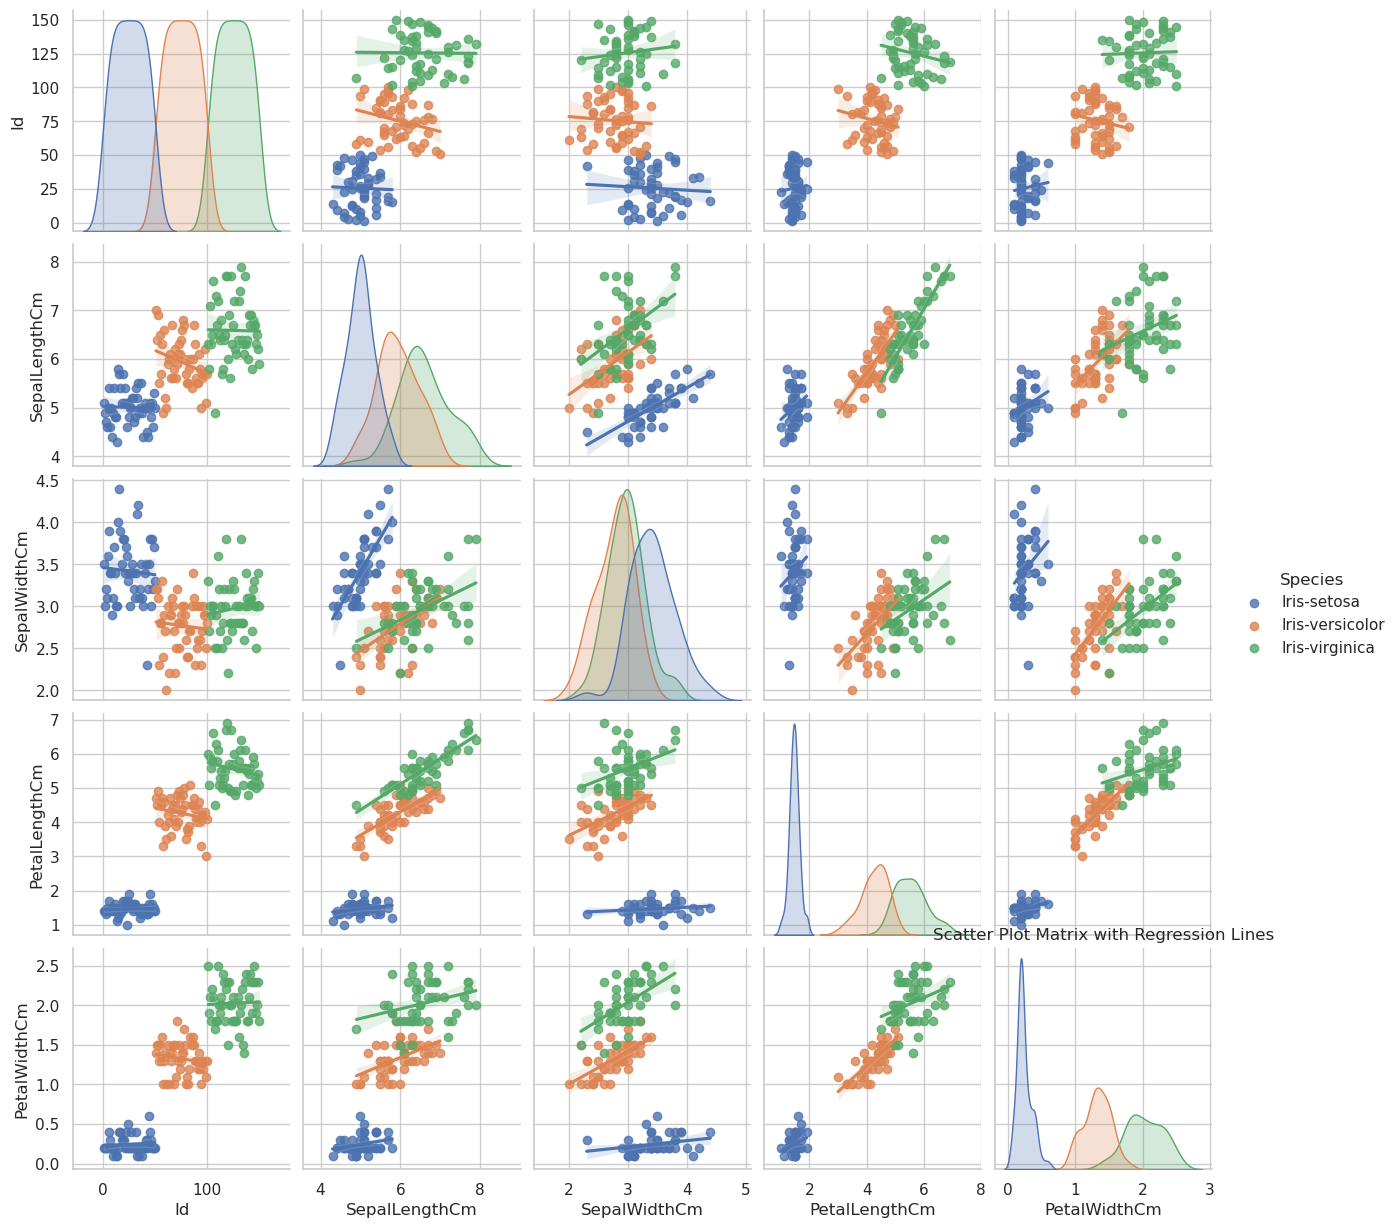

In [19]:
sns.pairplot(data=df, kind='reg', hue='Species')
plt.title('Scatter Plot Matrix with Regression Lines')
plt.show()

# **3D plot**

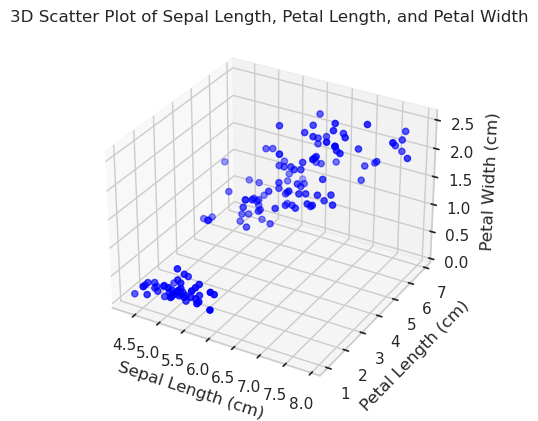

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['SepalLengthCm'], df['PetalLengthCm'], df['PetalWidthCm'], c='blue')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Scatter Plot of Sepal Length, Petal Length, and Petal Width')
plt.show()